# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#### **Importing Dataset and creating a copy of that dataset**

In [2]:
data = pd.read_csv('tpms.csv')
df = data.copy() 

#### **Displaying first five rows** 

In [3]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Droping 'unnamed: 0' column**

In [4]:
df.drop('Unnamed: 0', axis=True, inplace=True)

#### **Checking the number of rows and columns**

In [5]:
df.shape

(215909, 9)

#### **Checking data types of all columns**

In [6]:
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Checking summary statistics**

In [7]:
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Checking summary statistics of all columns, including object dataypes**

In [8]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


#### **Checking null values in dataset**

In [9]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Filling the Null values in the 'price' column.**<br>


In [10]:
df['price'].fillna(df['price'].mean(),inplace=True)

#### **Droping the rows containing Null values in the attributes train_class and fare**

In [11]:
df.dropna(inplace=True)

#### **Droping 'insert_date'**

In [12]:
df.drop('insert_date',axis=1,inplace=True)

**Checking null values again in dataset**

In [13]:
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Ploting number of people boarding from different stations**


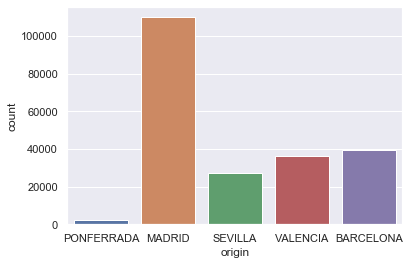

In [14]:
sns.countplot(x='origin', data=df);

#### **Ploting number of people for the destination stations**


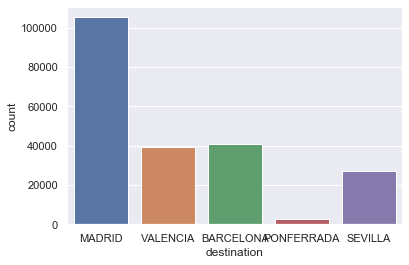

In [15]:
sns.countplot(x='destination', data=df);

#### **Ploting different types of train that runs in Spain**


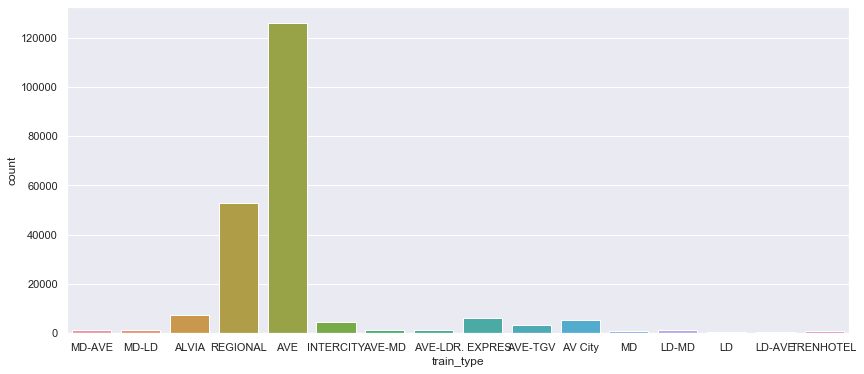

In [16]:
plt.figure(figsize=(14,6))
sns.countplot(x='train_type', data=df);

#### **Ploting number of trains of different class**


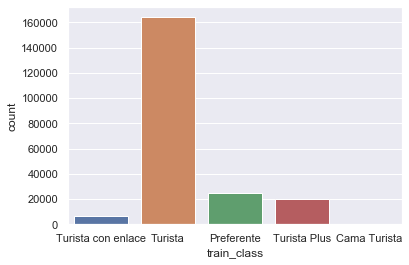

In [17]:
sns.countplot(x='train_class', data=df);

#### **Ploting number of tickets bought from each category**


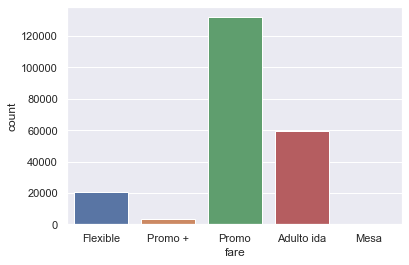

In [18]:
sns.countplot(x='fare', data=df);

#### **Ploting distribution of the ticket prices**

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'], rug=True);

###### **Showingtrain_class vs price through boxplot**

In [ ]:
sns.boxplot(x='train_class',y='price',data=df);

#### **Showing train_type vs price through boxplot**


In [ ]:
plt.figure(figsize=(15,6)) 
sns.boxplot(x='train_type',y='price',data=df);

## Feature Engineering


In [ ]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Importing datetime library**

In [ ]:
import datetime

In [ ]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [ ]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

#### **Removing redundant features**


In [ ]:
df.drop(['start_date','end_date'],axis=1,inplace=True)
df.head()            

We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Finding out people travelling from MADRID to SEVILLA

In [ ]:
df1 = df[(df['origin']=="MADRID") & (df['destination']=="SEVILLA")]
df1.head()

#### Making a plot for finding out travelling hours for each train type

In [ ]:
sns.barplot(x="train_type",y="travel_time_in_hrs",data=df1);

#### **Showing train_type vs price through boxplot**


In [ ]:
sns.boxplot(x="train_type",y="price",data=df1);

## **Travelling from MADRID to BARCELONA**


#### Finding out people travelling from MADRID to BARCELONA

In [ ]:
df1 = df[(df['origin']=="MADRID") & (df['destination']=="BARCELONA")]
df1.head()

#### Making a plot for finding out travelling hours for each train type

In [ ]:
sns.barplot(x="train_type",y="travel_time_in_hrs",data=df1);

#### **Showing train_type vs price through boxplot**

In [ ]:
sns.boxplot(x="train_type",y="price",data=df1);

## **Travelling from MADRID to VALENCIA**

#### Finding out people travelling from MADRID to VALENCIA

In [ ]:
df1 = df[(df['origin']=="MADRID") & (df['destination']=="VALENCIA")]
df1.head()

#### Making a plot for finding out travelling hours for each train type


In [ ]:
sns.barplot(x="train_type",y="travel_time_in_hrs",data=df1);

#### **Showing train_type vs price through boxplot**

In [ ]:
sns.boxplot(x="train_type",y="price",data=df1);

## **Travelling from MADRID to PONFERRADA**

#### Finding out people travelling from MADRID to PONFERRADA

In [ ]:
df1 = df[(df['origin']=="MADRID") & (df['destination']=="PONFERRADA")]
df1.head()

#### Making a plot for finding out travelling hours for each train type

In [ ]:
sns.barplot(x="train_type",y="travel_time_in_hrs",data=df1);

#### **Showing train_type vs price through boxplot**

In [ ]:
sns.boxplot(x="train_type",y="price",data=df1);

# Applying Linear  Regression

In [ ]:
df.head()

#### Importing LabelEncoder library from sklearn 

In [ ]:
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [ ]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [ ]:
df.head()

#### Separating the dependant and independant variables

In [ ]:
X = df.iloc[:,[1,2,3,5,6,7]].values
Y = df.iloc[:,4].values

#### Importing test_train_split from sklearn

In [ ]:
from sklearn.model_selection import train_test_split

#### **Spliting the data into training and test set**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

#### Importing LinearRegression library from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

#### Making an object of LinearRegression( ) and train it using the training data set

In [ ]:
lr = LinearRegression()             
lr.fit(X_train,Y_train)

In [ ]:
lr.score(X_test,Y_test)

#### Finding out the predictions using test data set.

In [ ]:
lr_predict=lr.predict(X_test)

#### Finding out the predictions using training data set.

In [ ]:
lr_predict_train=lr.predict(X_train)

#### Importing r2_score library form sklearn and find out the R2 Score for test data and print it.

In [ ]:
from sklearn.metrics import r2_score
lr_r2_test= r2_score(Y_test, lr_predict)

#### Finding out the R2 Score for training data and print it.

In [ ]:
lr_r2_train= r2_score(Y_train, lr_predict_train)

Comaparing training and testing R2 scores

In [ ]:
print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

# Applying Polynomial Regression

#### Importing PolynomialFeatures from sklearn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#### Making and objecting of default Polynomial Features

In [ ]:
poly_reg = PolynomialFeatures()

#### Transforming the features to higher degree features.

In [ ]:
X_train_poly,X_test_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)

#### Fitting the transformed features to Linear Regression

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

#### Finding the predictions on the data set

In [ ]:
y_train_predicted,y_test_predict = poly_model.predict(X_train_poly),poly_model.predict(X_test_poly)

#### Evaluating R2 score for training data set

In [ ]:
r2_train = r2_score(Y_train, y_train_predicted)

#### Evaluating R2 score for test data set

In [ ]:
r2_test = r2_score(Y_test, y_test_predict)

Comaparing training and testing R2 scores

In [ ]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

#### Selecting the best model

In [ ]:
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
   
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

#### Plotting the model

In [ ]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Finding out the complexity using R2 score, 3 model gives the best result.**